In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

In [2]:
def draw(G, pos, measures, measure_name):
    #nx.draw(G, with_labels=True)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.RdYlGn, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off') 
    plt.savefig(measure_name + ".png", format="PNG", dpi=300, bbox_inches='tight')
    plt.show(block=False)


In [3]:
G = nx.karate_club_graph()
#G = nx.read_edgelist('musae_git_edges.csv', delimiter=',')

In [4]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

In [5]:
h,a = nx.hits(DiG)

In [6]:
!pip3 install pygraphviz

In [7]:
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")

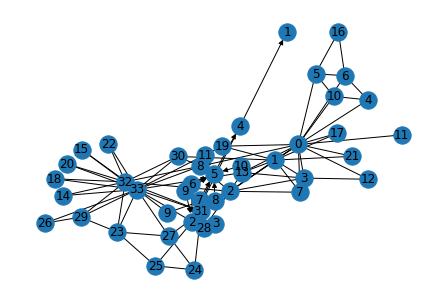

In [8]:
nx.draw_spring(G, with_labels=True)
plt.savefig("random" + ".png", format="PNG", dpi=300, bbox_inches='tight')
nx.draw_spring(DiG, with_labels=True)
plt.savefig("randomDiG" + ".png", format="PNG", dpi=300, bbox_inches='tight')
plt.show()

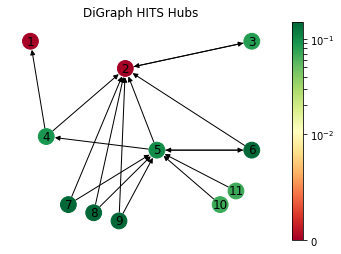

In [9]:
draw(DiG, dpos, h, 'DiGraph HITS Hubs')

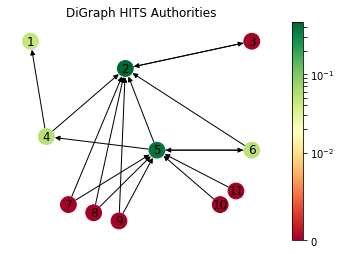

In [10]:
draw(DiG, dpos, a, 'DiGraph HITS Authorities')

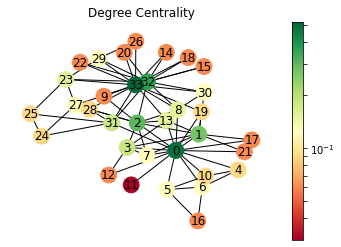

In [11]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

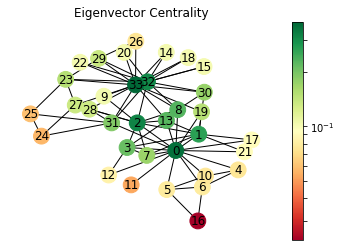

In [12]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

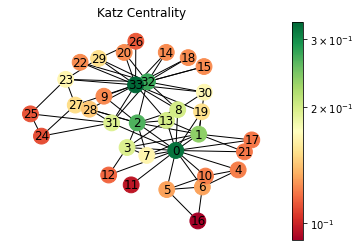

In [13]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')

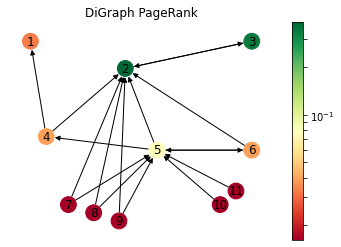

In [14]:
draw(DiG, dpos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')

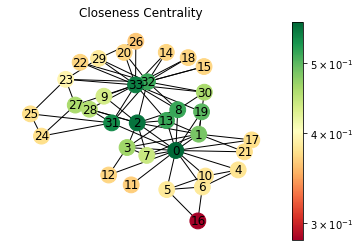

In [15]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

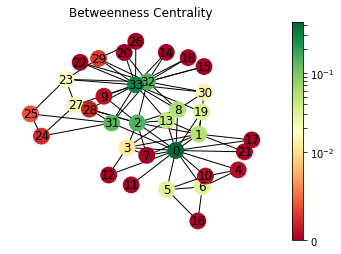

In [16]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

In [17]:
print(G.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [18]:
p = nx.katz_centrality(G)
print(p.values())

dict_values([0.3213245969592325, 0.2354842531944946, 0.2657658848154288, 0.1949132024917254, 0.12190440564948413, 0.1309722793286492, 0.1309722793286492, 0.166233052026894, 0.2007178109661081, 0.12420150029869696, 0.12190440564948413, 0.09661674181730141, 0.11610805572826272, 0.19937368057318847, 0.12513342642033795, 0.12513342642033795, 0.09067874388549631, 0.12016515915440099, 0.12513342642033795, 0.15330578770069542, 0.12513342642033795, 0.12016515915440099, 0.12513342642033795, 0.16679064809871574, 0.11021106930146936, 0.11156461274962841, 0.11293552094158042, 0.1519016658208186, 0.143581654735333, 0.15310603655041516, 0.16875361802889585, 0.19380160170200547, 0.2750851434662392, 0.3314063975218936])
